<a href="https://colab.research.google.com/github/jaison-leonardo/house-predictor-ML/blob/main/cnn_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Mounted at /content/drive


In [5]:
!unzip -q "/content/drive/MyDrive/project_cnn_fish/dataset_split.zip" -d "/content/dataset_split"

In [6]:
train_dir = "/content/dataset_split/dataset_split/train"
valid_dir = "/content/dataset_split/dataset_split/valid"
test_dir  = "/content/dataset_split/dataset_split/test"

# Aumentación para train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Solo normalización
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6300 images belonging to 9 classes.
Found 1350 images belonging to 9 classes.
Found 1350 images belonging to 9 classes.


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Congelar capas base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas de clasificación
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,233 (9.87 MB)

 Trainable params: 330,249 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/best_model.h5", monitor="val_accuracy",
                             save_best_only=True, mode="max")

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6941 - loss: 0.9389

197/197 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.6948 - loss: 0.9366 - val_accuracy: 0.9756 - val_loss: 0.0768
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9501 - loss: 0.1584

197/197 ━━━━━━━━━━━━━━━━━━━━ 478s 2s/step - accuracy: 0.9501 - loss: 0.1584 - val_accuracy: 0.9763 - val_loss: 0.0725
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9609 - loss: 0.1169

197/197 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.9609 - loss: 0.1168 - val_accuracy: 0.9926 - val_loss: 0.0278
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.9761 - loss: 0.0737 - val_accuracy: 0.9837 - val_loss: 0.0401
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9730 - loss: 0.0790

197/197 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.9730 - loss: 0.0791 - val_accuracy: 0.9978 - val_loss: 0.0137
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 484s 2s/step - accuracy: 0.9742 - loss: 0.0761 - val_accuracy: 0.9963 - val_loss: 0.0142
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 493s 3s/step - accuracy: 0.9738 - loss: 0.0761 - val_accuracy: 0.9956 - val_loss: 0.0177
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.9834 - loss: 0.0549 - val_accuracy: 0.9978 - val_loss: 0.0077
Epoch 9/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9757 - loss: 0.0676

197/197 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.9757 - loss: 0.0676 - val_accuracy: 0.9993 - val_loss: 0.0066
Epoch 10/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 479s 2s/step - accuracy: 0.9840 - loss: 0.0452 - val_accuracy: 0.9970 - val_loss: 0.0093
Epoch 11/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - accuracy: 0.9802 - loss: 0.0534 - val_accuracy: 0.9919 - val_loss: 0.0230
Epoch 12/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 499s 3s/step - accuracy: 0.9836 - loss: 0.0471 - val_accuracy: 0.9970 - val_loss: 0.0088
Epoch 13/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.9832 - loss: 0.0472 - val_accuracy: 0.9837 - val_loss: 0.0367
Epoch 14/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 497s 3s/step - accuracy: 0.9818 - loss: 0.0523 - val_accuracy: 0.9926 - val_loss: 0.0228
Epoch 15/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.9826 - loss: 0.0487 - val_accuracy: 0.9956 - val_loss: 0.0094
Epoch 16/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.9834 - loss: 0.0555 - val_accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9934 - loss: 0.0130
✅ Accuracy en test: 0.99
43/43 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step


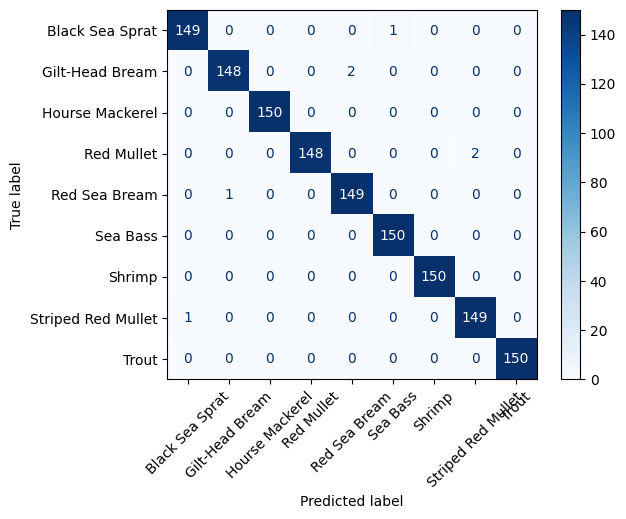

In [7]:
from tensorflow.keras.models import load_model

# Cargar el modelo
model = load_model("/content/drive/MyDrive/best_model.h5")
# Evaluación
loss, acc = model.evaluate(test_generator)
print(f"✅ Accuracy en test: {acc:.2f}")

# Predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()


In [11]:
import numpy as np
from sklearn.metrics import classification_report

# Informe detallado
report = classification_report(
  y_true,
  y_pred_classes,
  target_names=labels,
  digits=4
)
print(report)

                    precision    recall  f1-score   support

   Black Sea Sprat     0.9933    0.9933    0.9933       150
   Gilt-Head Bream     0.9933    0.9867    0.9900       150
   Hourse Mackerel     1.0000    1.0000    1.0000       150
        Red Mullet     1.0000    0.9867    0.9933       150
     Red Sea Bream     0.9868    0.9933    0.9900       150
          Sea Bass     0.9934    1.0000    0.9967       150
            Shrimp     1.0000    1.0000    1.0000       150
Striped Red Mullet     0.9868    0.9933    0.9900       150
             Trout     1.0000    1.0000    1.0000       150

          accuracy                         0.9948      1350
         macro avg     0.9948    0.9948    0.9948      1350
      weighted avg     0.9948    0.9948    0.9948      1350

